In [2]:
# all imports
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [28]:
# defining functions

# reads xml-data

def read_data(file):
    with open(file, 'r') as f:
        data = f.read()
    bs_data = bs(data, 'xml') 
    return bs_data


# gets the bname for calculations
def get_bname(path):
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')
            return b_name    


# returns a dataframe given some data
def values_df(bs_data, low, high):
    b_name = bs_data.find_all('name')
    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    
    # finds x-, y- and z-values and computes euclidian distance
    for i in range(low, high):
        r = calc(b_name, i)
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df


# calculates the euclidian values
def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    return r


# calculates difference between max and min 
def get_differences_values(path, low, high):
    i = 0
    diff_list = []
    
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            try:
                bs_data = read_data(path + xml_file)
                b_name = bs_data.find_all('name')
                
                # fix since these values for some reason don't work when passed as arguments
                if low >= 3*int(len(b_name)/4):
                    low = 3*int(len(b_name)/4)
                    high = int(len(b_name))
                    
                df1 = values_df(bs_data, low, high)

                df_max = pd.DataFrame(df1.max().to_dict(),index=[df1.index.values[-1]])
                df_min = pd.DataFrame(df1.min().to_dict(),index=[df1.index.values[-1]])
                df1 = df_max.subtract(df_min, fill_value=0)
                df1 = df1.rename(index={100:i})

                diff_list.append(df1)
                i+=1
            except:
                 print(xml_file + " failed to compute")
        else:
            continue
            
    data_level = pd.concat(diff_list)
    print(f"Length of how many timeseries-files of {path} people we have between files {low} and {high}: {i}")

    return data_level

def get_mean_values(path, low, high):
    i = 0
    mean_list = []
    
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')

            # fix since these values for some reason don't work when passed as arguments
            if low >= 3*int(len(b_name)/4):
                low = 3*int(len(b_name)/4)
                high = int(len(b_name))

            try:
                df1 = values_df(bs_data, low, high)
                df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
                df1 = df1.rename(index={100:i})

                mean_list.append(df1)
                i+=1
            except:
                print(xml_file + "failed to compute")
        else:
            continue
    data_level = pd.concat(mean_list)
    print(f"Length of how many timeseries-files of {path} people we have between files {low} and {high}: {i}")

    return data_level

In [29]:
path = "usethis/Healthy/"

b_name = get_bname(path)

diff_df_level1 = get_differences_values(path, 0, int(len(b_name)/4))
diff_df_level2 = get_differences_values(path, int(len(b_name)/4), int(len(b_name)/2))
diff_df_level3 = get_differences_values(path, int(len(b_name)/2), int(3*len(b_name)/4))
diff_df_level4 = get_differences_values(path, int(3*len(b_name)/4), int(len(b_name)))

mean_df_level1 = get_mean_values(path, 0, int(len(b_name)/4))
mean_df_level2 = get_mean_values(path, int(len(b_name)/4), int(len(b_name)/2))
mean_df_level3 = get_mean_values(path, int(len(b_name)/2), int(3*len(b_name)/4))
mean_df_level4 = get_mean_values(path, int(3*len(b_name)/4), int(len(b_name)))

# calculate the four power levels for injured people:

path = "usethis/PFPS/"

diff_df_level1_inj = get_differences_values(path, 0, int(len(b_name)/4))
diff_df_level2_inj = get_differences_values(path, int(len(b_name)/4), int(len(b_name)/2))
diff_df_level3_inj = get_differences_values(path, int(len(b_name)/2), int(3*len(b_name)/4))
diff_df_level4_inj = get_differences_values(path, int(3*len(b_name)/4), len(b_name))

mean_df_level1_inj = get_mean_values(path, 0, int(len(b_name)/4))
mean_df_level2_inj = get_mean_values(path, int(len(b_name)/4), int(len(b_name)/2))
mean_df_level3_inj = get_mean_values(path, int(len(b_name)/2), int(3*len(b_name)/4))
mean_df_level4_inj = get_mean_values(path, int(3*len(b_name)/4), int(len(b_name)))

timeseries-44.xml failed to compute
timeseries-10.xml failed to compute
Length of how many timeseries-files of usethis/Healthy/ people we have between files 0 and 32: 21
timeseries-10.xml failed to compute
Length of how many timeseries-files of usethis/Healthy/ people we have between files 32 and 64: 22
timeseries-10.xml failed to compute
Length of how many timeseries-files of usethis/Healthy/ people we have between files 64 and 96: 22
timeseries-23.xml failed to compute
timeseries-10.xml failed to compute
Length of how many timeseries-files of usethis/Healthy/ people we have between files 93 and 126: 21
timeseries-44.xmlfailed to compute
timeseries-10.xmlfailed to compute
Length of how many timeseries-files of usethis/Healthy/ people we have between files 0 and 32: 21
timeseries-10.xmlfailed to compute
Length of how many timeseries-files of usethis/Healthy/ people we have between files 32 and 64: 22
timeseries-10.xmlfailed to compute
Length of how many timeseries-files of usethis/Heal

In [62]:
df_healthy_diff = pd.concat([diff_df_level1, diff_df_level2, diff_df_level3, diff_df_level4])
df_pfps_diff = pd.concat([diff_df_level1_inj, diff_df_level2_inj, diff_df_level3_inj, diff_df_level4_inj])
df_all_diff = pd.concat([df_healthy_diff, df_pfps_diff])

df_healthy_mean = pd.concat([mean_df_level1, mean_df_level2, mean_df_level3, mean_df_level4])
df_pfps_mean = pd.concat([mean_df_level1_inj, mean_df_level2_inj, mean_df_level3_inj, mean_df_level4_inj])
df_all_mean = pd.concat([df_healthy_mean, df_pfps_mean])

<IPython.core.display.Javascript object>


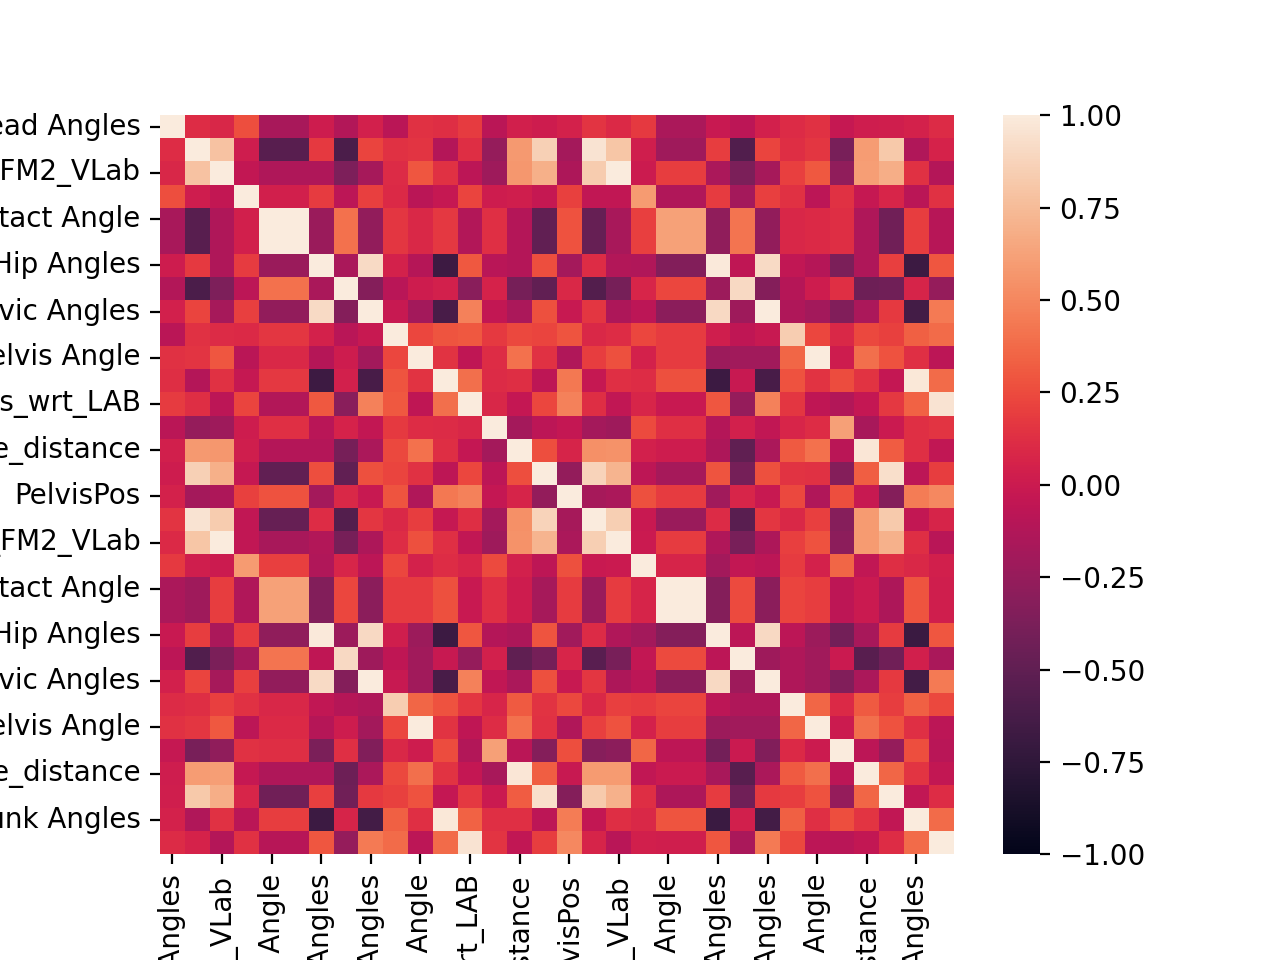

In [63]:
%matplotlib nbagg
corrMatrix = df_healthy_mean.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1)
plt.show()

In [64]:
del df_healthy_mean["Head Angles"]
del df_healthy_mean["Left Ankle Angles"]
del df_healthy_mean["Left Wrist Angles"]
del df_healthy_mean["Right Ankle Angles"]
del df_healthy_mean["Right Wrist Angles"]
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(df_healthy_mean)
corrMatrix = df_healthy_mean.corr()

,L_FCC_VLab,L_FM2_VLab,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,Left Shoulder_Pelvis Angle,Left Trunk Angles,Left Trunk Angles_wrt_LAB,Left_Knee_Ankle_distance,Left_Knee_VLab,PelvisPos,R_FCC_VLab,R_FM2_VLab,Right Foot Contact Angle,Right Foot Progression,Right Hip Angles,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB
0,76.171308,66.542881,35.398566,35.398566,64.739569,80.167860,22.190777,85.413668,4.035397,38.595395,60.357426,37.203390,32.962729,1.383037,76.027200,65.889427,28.346493,28.346493,64.662429,81.591355,22.214431,78.594444,4.060066,36.213599,31.623101,38.576006,60.359592
1,83.293229,79.136342,31.231511,31.231511,49.755023,73.992013,2.971722,80.946712,16.498809,51.007964,50.133570,42.576306,37.110845,1.213547,85.620393,78.488618,24.653790,24.653790,49.716007,74.561679,2.977401,80.337131,16.549794,43.857239,35.170004,51.061656,50.157052
2,79.680261,71.636891,37.509368,37.509368,70.692397,75.427199,23.166557,81.602113,25.885851,25.465796,48.308919,40.889534,34.571059,1.130166,78.486377,71.261786,32.999116,32.999116,71.055545,76.116473,23.124950,83.917632,26.040101,40.911431,34.330867,25.550287,48.349622
3,89.884093,76.206056,24.285170,24.285170,71.033814,73.150243,24.471191,87.565423,13.070109,34.442430,58.732227,44.134276,42.298624,1.167497,88.188153,75.848753,22.331453,22.331453,72.413732,73.734703,24.509791,74.900503,12.929479,43.590940,42.111381,34.396227,58.719753
4,90.797609,80.813721,27.180673,27.180673,68.564674,74.153022,23.330814,90.932246,31.382722,29.032343,52.014761,45.495936,41.685463,1.220319,90.396971,80.252684,26.028122,26.028122,67.967731,74.582458,23.341459,87.801950,31.423540,45.104773,41.652996,29.017715,52.002930
5,84.501617,73.988494,24.842388,24.842388,66.264674,74.125489,18.667810,96.582409,15.695445,30.985995,49.051820,40.609305,39.232134,1.089433,82.753041,73.764628,25.241264,25.241264,66.798980,74.779176,18.688015,90.242213,15.650085,41.060101,39.619741,30.981455,49.056342
6,91.033232,79.260433,22.092963,22.092963,73.298021,64.275354,34.832475,83.547150,6.967469,29.764903,63.309281,40.072576,46.342710,1.165865,92.048764,79.501448,24.064797,24.064797,75.614805,70.091538,34.787837,79.282735,6.991826,41.493335,43.385215,29.796965,63.318729
7,80.552033,71.759791,30.703346,30.703346,57.874228,73.201697,12.314712,72.911755,7.969369,36.124728,48.086670,41.270554,34.719579,1.110548,80.238414,71.278081,28.240800,28.240800,58.491081,74.669459,12.265863,71.520745,7.931736,41.525563,35.016787,36.208300,48.117289
8,85.773271,74.324293,21.125337,21.125337,63.810747,72.275200,24.233270,51.219344,15.241047,19.039485,42.689793,41.421448,37.563456,1.129428,85.835742,74.018889,19.174265,19.174265,63.234766,72.029085,24.253376,54.568612,15.192865,41.721975,36.753433,19.020907,42.691276
9,88.474165,83.514288,33.274449,33.274449,60.416446,72.098381,13.096065,79.799119,23.429939,37.435383,50.287908,43.760848,39.864011,1.188115,87.957708,83.083732,30.598401,30.598401,59.752478,73.368717,13.120227,80.417271,23.649639,43.507985,41.465657,37.472319,50.338849


<IPython.core.display.Javascript object>


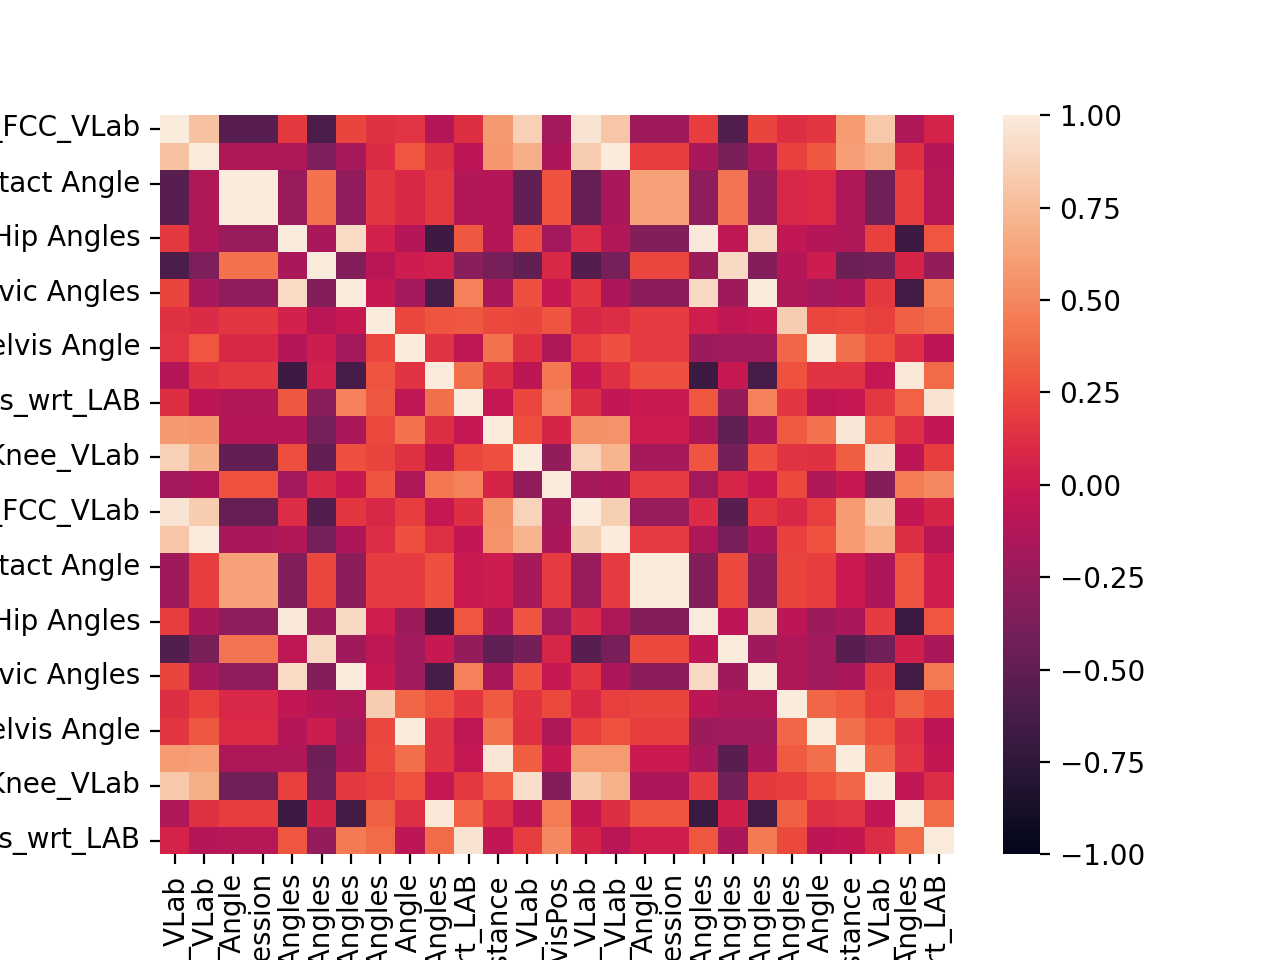

In [65]:
%matplotlib nbagg
corrMatrix = df_healthy_mean.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1)
plt.show()

<IPython.core.display.Javascript object>


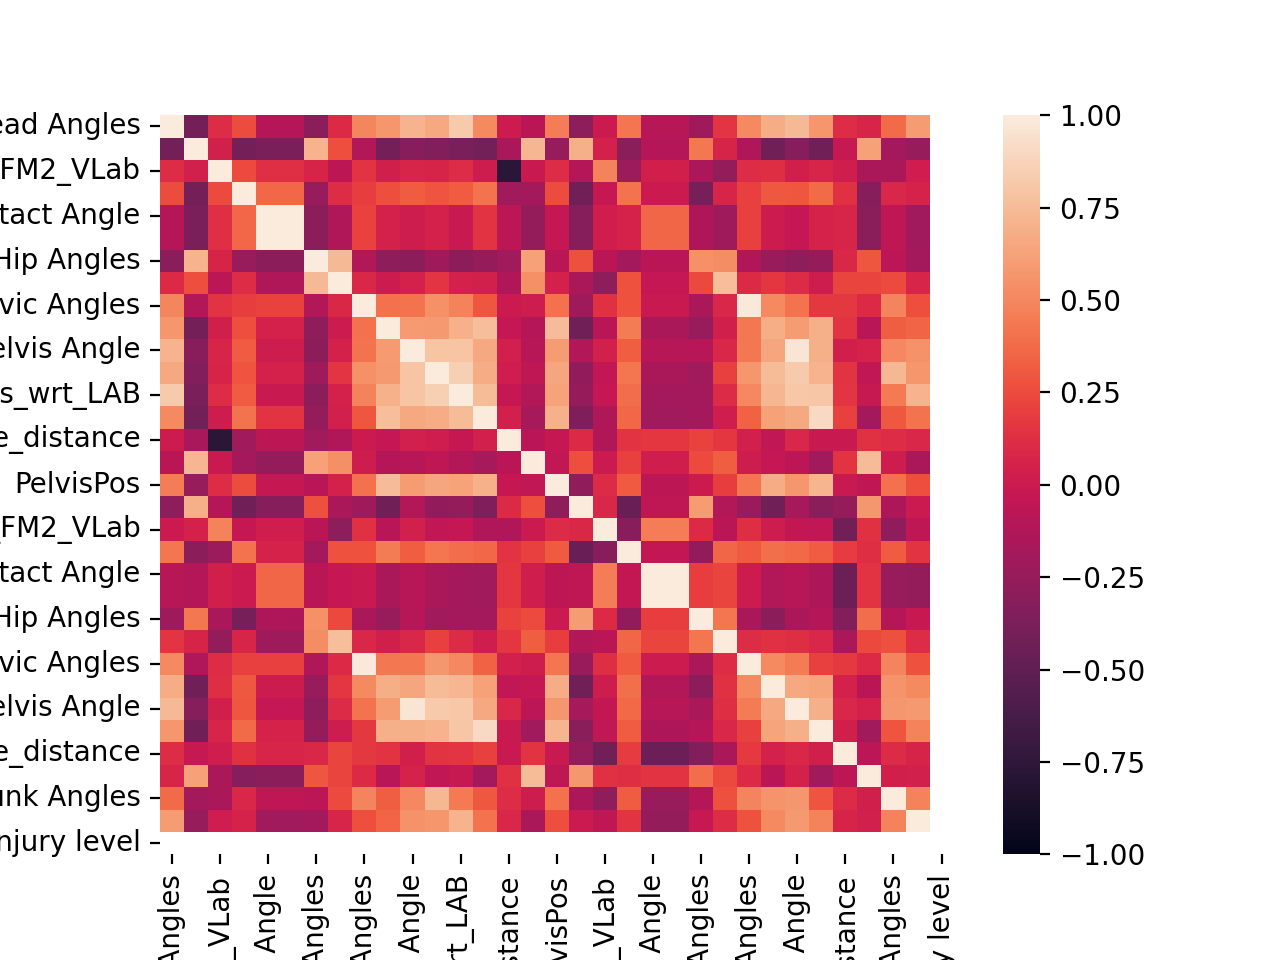

In [24]:
%matplotlib nbagg
corrMatrix = df_healthy_diff.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1)
plt.show()

<IPython.core.display.Javascript object>


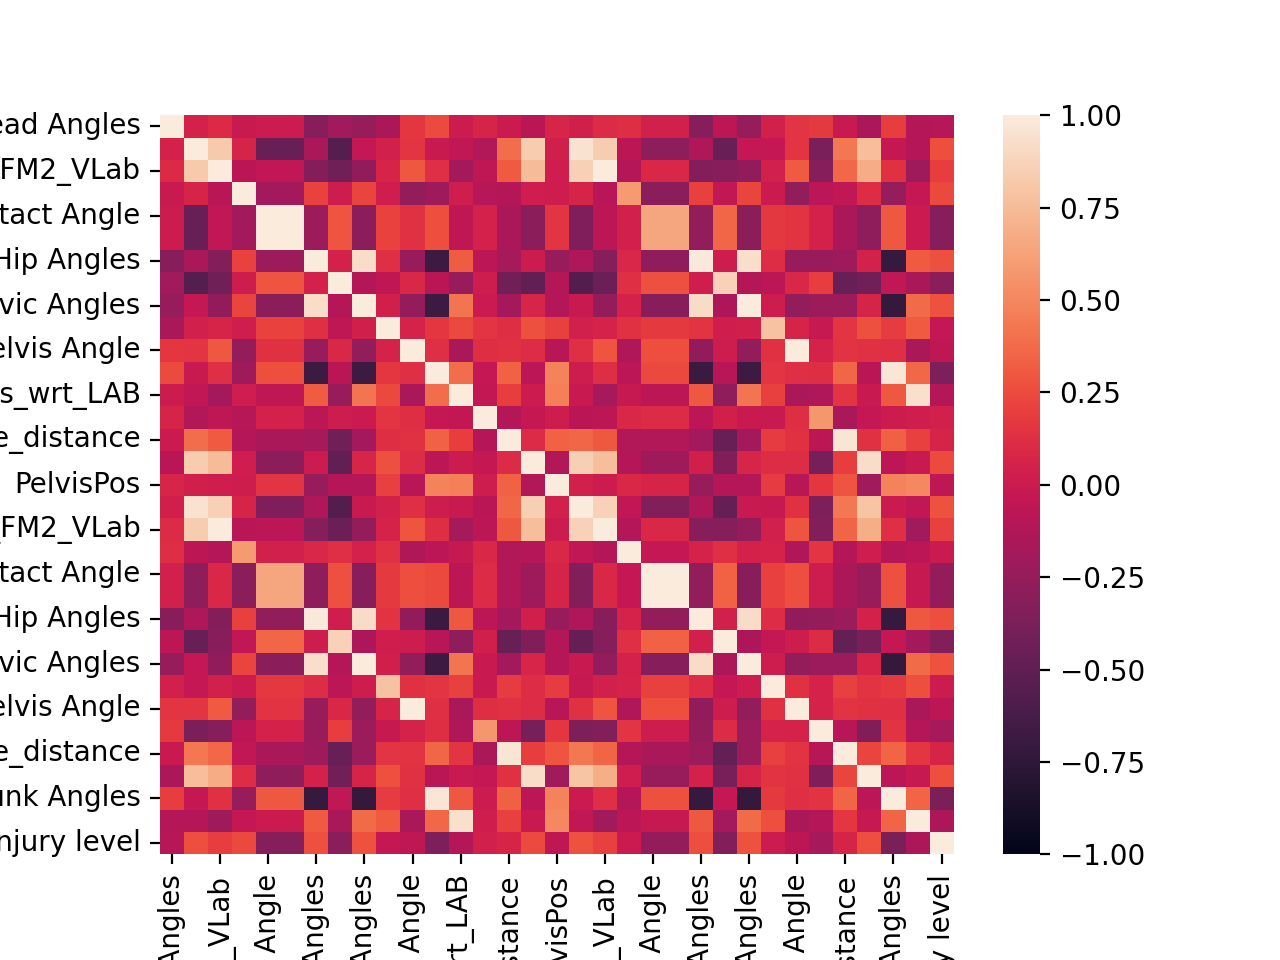

In [26]:
%matplotlib nbagg
corrMatrix = df_all_mean.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1)
plt.show()